In [1]:
import math
from tensorboardX import SummaryWriter
sess = None

In [2]:
import tensorflow as tf
import collections
gpu_options = tf.GPUOptions(allow_growth=True,per_process_gpu_memory_fraction=0.8)
tf.reset_default_graph()
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

In [3]:
from gym import envs
#print(envs.registry.all())

4
done
(84, 84, 4)


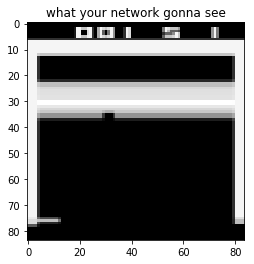

In [4]:
from wrappers import make_atari_deepmind
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#env_name = "PongNoFrameskip-v4"
env_name = "BreakoutNoFrameskip-v4"
env = make_atari_deepmind(env_name)
observation_shape = env.observation_space.shape
n_actions = env.action_space.n
print(n_actions)
obs = env.reset()
obs, r, done, _ = env.step(2)
#print(obs.shape)
#print(is_done)
done = False
for _ in range(2000):
    obs, _, done, _ = env.step(3)
    obs = np.array(obs)
    if done:
        print('done')
        break
plt.title("what your network gonna see")
print (obs.shape)
plt.imshow(obs[:,:,0],interpolation='none',cmap='gray');

In [5]:

from dqnagent import DQNAgent

import networks


#agent.epsilon = 0.5

breakout_dddqn_config = {
    'GAMMA' : 0.99,
    'LEARNING_RATE' : 1e-4,
    'STEPS_PER_EPOCH' : 8,
    'BATCH_SIZE' : 32 * 2,
    'EPSILON' : 0,
    'MIN_EPSILON' : 0,
    'EPSILON_DECAY_FRAMES' : 100000,
    'NUM_EPOCHS_TO_COPY' : 1000,
    'NAME' : 'ENDDDQN2',
    'IS_DOUBLE' : False,
    'DUELING_TYPE' : 'AVERAGE',
    'SCORE_TO_WIN' : 420,
    'NUM_STEPS_FILL_BUFFER' : 10000,
    'REPLAY_BUFFER_TYPE' : 'normal',
    'REPLAY_BUFFER_SIZE' : 10000,
    'PRIORITY_BETA' : 0.4,
    'PRIORITY_ALPHA' : 0.6,
    'BETA_DECAY_FRAMES' : 1e5,
    'MAX_BETA' : 1,
    'LIVES_REWARD' : 5,
    'NETWORK' : networks.AtariNoisyDuelingDQN()
    }


pong_dddqn_config = {
    'GAMMA' : 0.99,
    'LEARNING_RATE' : 1e-4,
    'STEPS_PER_EPOCH' : 8,
    'BATCH_SIZE' : 32 * 4,
    'EPSILON' : 1.0,
    'MIN_EPSILON' : 0.02,
    'EPSILON_DECAY_FRAMES' : 100000,
    'NUM_EPOCHS_TO_COPY' : 1000,
    'NAME' : 'PongDDDQN',
    'IS_DOUBLE' : True,
    'DUELING_TYPE' : 'AVERAGE',
    'SCORE_TO_WIN' : 20,
    'NUM_STEPS_FILL_BUFFER' : 10000,
    'REPLAY_BUFFER_TYPE' : 'prioritized',
    'REPLAY_BUFFER_SIZE' : 100000,
    'PRIORITY_BETA' : 0.4,
    'PRIORITY_ALPHA' : 0.6,
    'BETA_DECAY_FRAMES' : 1e5,
    'MAX_BETA' : 1,
    'NETWORK' : networks.AtariDuelingDQN(),
    'LIVES_REWARD' : 1
    }
agent = DQNAgent(env, sess, env_name, config = breakout_dddqn_config)
#agent.restore('nn/NDDDQNBreakoutNoFrameskip-v4')
#agent.epsilon = 0.02

In [6]:
env.reset()
agent.train()

560
saving next best rewards:  1.0
0.000149802
Frames per seconds:  189.63394214196765
1160
saving next best rewards:  1.25
0.00852379
1712
0.00785871
Frames per seconds:  170.1178745437945
2272
8.85815e-05
2880
saving next best rewards:  1.5
0.000137367
Frames per seconds:  186.05946888440812
3384
0.000256377
Frames per seconds:  184.65372012416776
4240
saving next best rewards:  2.5
0.00246545
4768
0.00394335
Frames per seconds:  185.75032466307405
5496
0.000438914
Frames per seconds:  197.88239664543352
6280
0.00810505
6920
0.00802225
Frames per seconds:  201.7026237810836
7888
saving next best rewards:  3.0
0.000251394
Frames per seconds:  206.90746569057885
8512
0.000638917
Frames per seconds:  201.86844242832348
9072
0.0024044
9528
0.00100486
Frames per seconds:  202.1785010365356
10112
0.00125655
10680
0.00177492
Frames per seconds:  204.12653195129798
11264
0.00679722
11752
0.001064
Frames per seconds:  197.22166136250635
12232
0.00111058
12776
0.000905006
Frames per seconds:  

Frames per seconds:  201.69768669905937
141872
saving next best rewards:  12.5
0.00245801
Frames per seconds:  201.60732939975983
Frames per seconds:  197.37689402673703
143568
0.00342269
Frames per seconds:  196.98913087687438
Frames per seconds:  198.74616088534475
145264
0.00258652
Frames per seconds:  199.87893761322198
Frames per seconds:  199.93512351438926
147208
0.00994176
Frames per seconds:  199.4289157815768
Frames per seconds:  199.67686493672264
149136
0.00763911
Frames per seconds:  199.9332841337982
Frames per seconds:  200.4558247265606
151488
saving next best rewards:  14.75
0.00646026
Frames per seconds:  201.34026058761077
Frames per seconds:  199.8937885053008
153776
0.00509543
Frames per seconds:  201.51606546539318
Frames per seconds:  200.8560617691541
Frames per seconds:  200.77686494378392
156112
0.00501118
Frames per seconds:  200.45444517810574
Frames per seconds:  199.85525124496652
158200
0.00383033
Frames per seconds:  199.93516163662477
Frames per seconds

Frames per seconds:  197.1052997510422
310512
saving next best rewards:  24.25
0.0127856
Frames per seconds:  197.573219266072
Frames per seconds:  198.3852872923
Frames per seconds:  197.135083769758
313000
0.0067094
Frames per seconds:  198.0916663435434
Frames per seconds:  194.6941654796243
315296
0.00589854
Frames per seconds:  190.11647302844378
Frames per seconds:  185.5086822076056
Frames per seconds:  185.88609854909885
318160
0.0027877
Frames per seconds:  186.61357745401537
Frames per seconds:  185.4055804537802
320768
0.00974561
Frames per seconds:  194.27912152922625
Frames per seconds:  187.8723440375033
Frames per seconds:  186.02505771947148
Frames per seconds:  188.2947514195605
324200
0.00434325
Frames per seconds:  188.68543469316458
Frames per seconds:  189.57640383265513
Frames per seconds:  187.4849752456416
327176
0.00755874
Frames per seconds:  187.90658341733038
Frames per seconds:  187.2747836795917
329048
0.00765961
Frames per seconds:  186.92667884558279
Fra

KeyboardInterrupt: 

In [7]:
#agent.epsilon = 0.2
#agent.train()
import wrappers

In [14]:
#env_monitor.close()
print(env.unwrapped.get_action_meanings())
def evaluate(env,t_max=10000):
    rewards = []
    env._max_episode_steps = 9999
    print('reset')
    #env = env.old_env
    s = env.reset()
    reward = 0
    for it in range(t_max):
        #e.render()
        qvalues = agent.get_qvalues([s])
        action = np.argmax(qvalues)
        s, r, done, _ = env.step(action)
        reward += r
        
            
        if done:
            
            break       
        
    return reward

import gym.wrappers
env_monitor = wrappers.make_atari_deepmind(env_name)
env_monitor = wrappers.ReallyDoneWrapper(env_monitor)
env_monitor = gym.wrappers.Monitor(env_monitor,directory='video_dddqn01',force=True, write_upon_reset=True)
sessions = [print('reward:', evaluate(env_monitor)) for _ in range(1)]
env_monitor.close()

['NOOP', 'FIRE', 'RIGHT', 'LEFT']
reset
lives: 4
lives: 3
lives: 2
lives: 1
lives: 0
reward: 20.0


In [11]:
#tf.reset_default_graph()
#agent = DQNAgent(env, sess, ExperienceBuffer(EXP_BUFFER_CAPACITY), env_name, config = dqn_config)

In [ ]:
#env.reset()
#agent.train()

In [1]:
import collections
import numpy as np
class ExperienceBuffer:
    def __init__(self, capacity):
        self.buffer = collections.deque(maxlen=capacity)

    def __len__(self):
        return len(self.buffer)

    def add(self, experience):
        self.buffer.append(experience)

    def sample(self, batch_size):
        indices = np.random.choice(len(self.buffer), batch_size, replace=True)
        states, actions, rewards, dones, next_states = zip(*[self.buffer[idx] for idx in indices])
        return np.array(states), np.array(actions), np.array(rewards, dtype=np.float32), \
               np.array(dones, dtype=np.uint8), np.array(next_states)

from experience import ReplayBuffer
import wrappers
import gym
import time
env = None
def play_step(buf, env, curr_state):
    action = env.action_space.sample()
    
    # do step in the environment
    #qvalues = agent.get_qvalues([curr_state])
    #action = np.argmax(qvalues)
    new_state, reward, is_done, _ = env.step(action)
    curr_state = new_state
    #buf.add(curr_state, action, reward, is_done, new_state)
    #obs_batch, act_batch, reward_batch, next_obs_batch, is_done_batch  = buf.sample(32)
    if is_done:
        curr_state = env.reset() 
    return curr_state

def do_test():
    buf = None
    buf = ReplayBuffer(100000)
    frame = 0
    dt = 0
    env = wrappers.make_atari_deepmind("BreakoutNoFrameskip-v4")
    curr_state = env.reset() 
    while True:
        frame += 1
        t1 = time.time()
        curr_state = play_step(buf, env, curr_state)
        t2 = time.time()
        dt += t2 - t1
        
        if frame % 1000 == 0 and frame != 0:
            print(dt)
            print(frame)
            dt = 0
            
        

In [2]:
do_test()

0.9454724788665771
1000
0.9255516529083252
2000
0.9444470405578613
3000
0.9045877456665039
4000
0.9414801597595215
5000
0.9036099910736084
6000
0.9175481796264648
7000
0.9135572910308838
8000
0.8975725173950195
9000
0.9265706539154053
10000
0.9275476932525635
11000
0.9254958629608154
12000


KeyboardInterrupt: 

In [20]:
import numpy as np
import pandas as pd
def show_mem_usage():
    '''Displays memory usage from inspection
    of global variables in this notebook'''
    gl = sys._getframe(1).f_globals
    vars= {}
    for k,v in list(gl.items()):
        # for pandas dataframes
        if hasattr(v, 'memory_usage'):
            mem = v.memory_usage(deep=True)
            if not np.isscalar(mem):
                mem = mem.sum()
            vars.setdefault(id(v),[mem]).append(k)
        # work around for a bug
        elif isinstance(v,pd.Panel):
            v = v.values
        vars.setdefault(id(v),[sys.getsizeof(v)]).append(k)
    total = 0
    for k,(value,*names) in vars.items():
        if value>1e6:
            print(names,"%.3fMB"%(value/1e6))
        total += value
    print("%.3fMB"%(total/1e6))

In [19]:
show_mem_usage()

0.135MB
